In [1]:
#importing pandas and numpy
import numpy as np
import pandas as pd

In [2]:
#reading the csv file
columns=["User_id","item_id","rating","timestamp"]
df=pd.read_csv('u.data',sep='\t',names = columns)

In [3]:
df.head()

,User_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
# Reading Movies_Id_titles file
Movie_titles = pd.read_csv('/home/yash/Desktop/Movie Recommendation System/Movie-Recommender-in-python-master/Movie_Id_Titles')
Movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
#Merging both the databese
df = pd.merge(df,Movie_titles,on='item_id')
df.head()

,User_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
#Exploring data using visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:

df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
#Creating a ratings dataframe with avg. rating and no. of ratings
Ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [10]:
Ratings['No. of Ratings']= df.groupby('title')['rating'].count()

In [11]:
Ratings.head()

,rating,No. of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


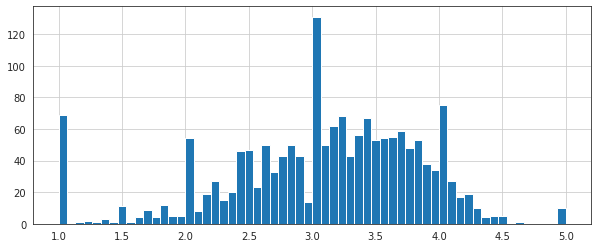

In [12]:
#plotting histograms for the data
plt.figure(figsize=(10,4))
Ratings['rating'].hist(bins=60)

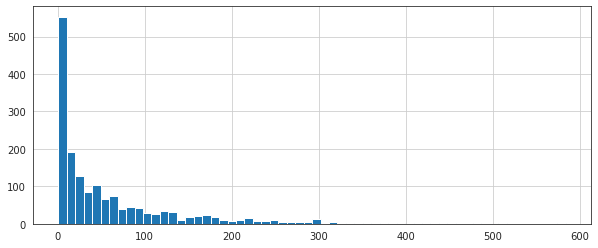

In [13]:
plt.figure(figsize=(10,4))
Ratings['No. of Ratings'].hist(bins=60)

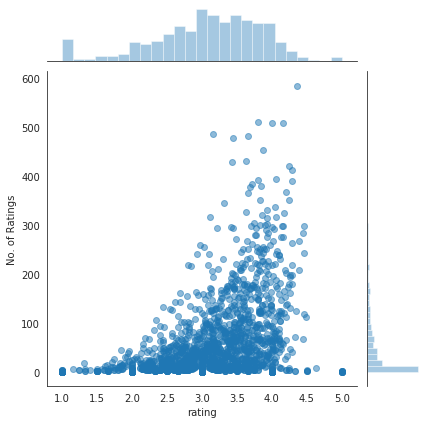

In [14]:
#Plotting Joint Plot
sns.jointplot(y='No. of Ratings',x='rating',data = Ratings , alpha=0.5)

In [15]:
#Creating a pivot table consisting of User Id and the movies title with rating values
Moviemat = df.pivot_table(index='User_id',columns='title',values ='rating')
Moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Ratings.sort_values("No. of Ratings",ascending =False).head()

,rating,No. of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [17]:
#User Ratings for Star Wars
starwars_ratings= Moviemat["Star Wars (1977)"]
starwars_ratings.head()

User_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [18]:
#Finding corelation from Starwars rating
starwars_ratings.dropna()
similar_to_Starwars= Moviemat.corrwith(starwars_ratings)

/home/yash/Downloads/yes/envs/yash/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/yash/Downloads/yes/envs/yash/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
similar_to_Starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [20]:
#Storing the data inti a datafrmae
corr_Starwars = pd.DataFrame(similar_to_Starwars,columns=['Correlation'])

In [21]:
corr_Starwars.sort_values('Correlation',ascending = False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [22]:
corr_Starwars=corr_Starwars.join(Ratings['No. of Ratings']) 


In [23]:
corr_Starwars.head()

,Correlation,No. of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [24]:
corr_Starwars[corr_Starwars['No. of Ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,No. of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [25]:
print("The Recommended movie will be Empire Strikes Back, The (1980), if the user watches Starwars. ")

The Recommended movie will be Empire Strikes Back, The (1980), if the user watches Starwars. 


In [30]:
#Similarily for the other movies
Contact_ratings=Moviemat["Contact (1997)"]
Contact_ratings.head()

User_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [31]:
#Dropping Nan values
Contact_ratings.dropna()

User_id
1      5.0
2      3.0
3      2.0
4      5.0
6      2.0
      ... 
938    5.0
939    4.0
940    5.0
941    4.0
942    4.0
Name: Contact (1997), Length: 509, dtype: float64

In [39]:
similar_to_Contact = Moviemat.corrwith(Contact_ratings)
print(similar_to_Contact)

similar_to_Contact.dropna()

title
'Til There Was You (1997)                0.904534
1-900 (1994)                                  NaN
101 Dalmatians (1996)                   -0.108441
12 Angry Men (1957)                      0.022265
187 (1997)                               0.135512
                                           ...   
Young Guns II (1990)                     0.326304
Young Poisoner's Handbook, The (1995)   -0.006864
Zeus and Roxanne (1997)                 -0.866025
unknown                                  0.243975
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


title
'Til There Was You (1997)                0.904534
101 Dalmatians (1996)                   -0.108441
12 Angry Men (1957)                      0.022265
187 (1997)                               0.135512
2 Days in the Valley (1996)              0.248031
                                           ...   
Young Guns (1988)                        0.388839
Young Guns II (1990)                     0.326304
Young Poisoner's Handbook, The (1995)   -0.006864
Zeus and Roxanne (1997)                 -0.866025
unknown                                  0.243975
Length: 1392, dtype: float64

In [47]:
#Finding the Recommended Movie
corr_Contact = pd.DataFrame(similar_to_Contact,columns=['Correlation'])
corr_Contact=corr_Contact.join(Ratings['No. of Ratings'])
corr_Contact[corr_Contact['No. of Ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,No. of Ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
...,...,...
Snow White and the Seven Dwarfs (1937),-0.182526,172
"Ice Storm, The (1997)",-0.186964,108
Some Like It Hot (1959),-0.204401,128
